# Численное интегрирование

Методы:
- метод прямоугольника
- метод трапеции

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas 

## Объявление переменных

In [163]:
a = 0
b = 1
dx = 0.0001
exp_int = 1
print("a = " + str(a))



a = 0


## Определение иинтегрируемой функции

$$f(x) = 3 \cdot x^2$$

In [164]:
def F(x):
    return 3 * x ** 2

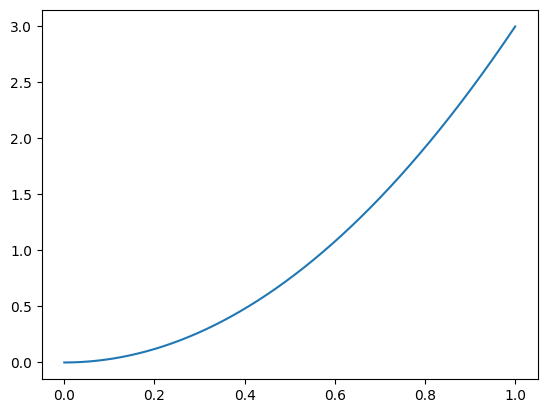

In [165]:
XX = np.arange(a, b + dx, dx)

YY = F(XX)
plt.plot(XX, YY)


# Метод прямоугольников

In [166]:
def IntegralRect(a, b, dx, f):
    S = 0

    n = 0
    while a < b -dx:
        S += f(a)
        a += dx
        n += 1
        #print(f"x: {a}; S: {S}")

    return S * dx, n
        


In [167]:
i_rect, n_rect = IntegralRect(a, b, dx, F)
i_rect, n_rect

(0.9998500049998275, 10000)

In [168]:
err_rect = abs(1-i_rect)

print(f"Integral of F(x) = {i_rect}")
print(f"           error = {err_rect}")

Integral of F(x) = 0.9998500049998275
           error = 0.00014999500017254253


# Метод трапеций

In [169]:
def IntegralTrop(a, b, dx, f):
    S = 0

    n = 0
    y1 = f(a)
    x= a + dx

    while x < b:
        
        y2 = f(x)

        S += y1 + y2
        x += dx
        n += 1
        y1 = y2
        
    return S / 2 * dx, n

In [170]:
i_trop, n_trop = IntegralTrop(a, b, dx, F)
i_trop, n_trop

(1.00000000499983, 10000)

In [171]:
err_trop = abs(1-i_trop)

print(f"Integral of F(x) = {i_trop}")
print(f"           error = {err_trop}")
#print(f"           error = {n_trop}")

Integral of F(x) = 1.00000000499983
           error = 4.9998301054898775e-09
           error = 10000


In [182]:
test = IntegralTrop(0, 1, dx, lambda x: np.sin(2 * np.pi * x))
test

(-6.6339356967828894e-15, 10000)

In [187]:
n1 = 0

def IneratiionsTest(f):
    global n1
    n1 = 0
    def Test(x):
        global n1
        n1 += 1
        return f(x)
        
    return Test

test = IntegralTrop(0, 1, dx, IneratiionsTest(F))
test, n1
        

((1.00000000499983, 10000), 10001)